<a href="https://colab.research.google.com/github/Mohamed-mahi/VerletDiffusionSim/blob/main/Mohamed-f2p%20updated%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class PES:
    def __init__(self, C0_min, C1_min, C2_min, C0_max, C1_max, C2_max, lattice_constant):
        self.Delta_0 = C0_max - C0_min
        self.Delta_1 = C1_max - C1_min
        self.Delta_2 = C2_max - C2_min
        self.C0_max = C0_max
        self.C1_max = C1_max
        self.C2_max = C2_max
        self.lattice_constant = lattice_constant

    def u(self, x, y):
        theta_x = 2. * np.pi * x / self.lattice_constant
        theta_y = 2. * np.pi * y / (self.lattice_constant * np.sqrt(3.))
        return 2.*(3. - 2. * np.cos(theta_x) * np.cos(theta_y) - np.cos(2. * theta_y))/9.

    def V(self, x, y, z):
        u_ = self.u(x, y)
        C0 = self.C0_max - self.Delta_0 * u_
        C1 = self.C1_max - self.Delta_1 * u_
        C2 = self.C2_max - self.Delta_2 * u_
        return C0 * np.exp(-z * C1) - C2 / (z**4)

    def force(self, x, y, z, h=1.e-6):
        energy = self.V(x, y, z)
        dV_dx = (self.V(x + h, y, z) - self.V(x - h, y, z)) / (2. * h)
        dV_dy = (self.V(x, y + h, z) - self.V(x, y - h, z)) / (2. * h)
        dV_dz = (self.V(x, y, z + h) - self.V(x, y, z - h)) / (2. * h)
        return -dV_dx,-dV_dy, -dV_dz

    def calculate_multiple(self, xs, ys, zs):
        energies = np.zeros((len(xs), len(ys)))
        forces_x = np.zeros((len(xs), len(ys)))
        forces_y = np.zeros((len(xs), len(ys)))
        forces_z = np.zeros((len(xs), len(ys)))

        for i in range(len(xs)):
            for j in range(len(ys)):
                energies[i, j] = self.V(xs[i], ys[j], zs)
                Fx, Fy, Fz = self.force(xs[i], ys[j], zs)
                forces_x[i, j] = Fx
                forces_y[i, j] = Fy
                forces_z[i, j] = Fz

        return energies, forces_x, forces_y, forces_z

In [ ]:
# given parameters
C0_min = 1.63093e6
C1_min = 3.347616
C2_min = 8184.70
C0_max = 2.75075e6
C1_max = 3.349208
C2_max = 8258.11
lattice_constant = 2.462
z = 3.2

# Define the range of x and y coordinates
x_range = np.linspace(0, 2*lattice_constant, 200)
y_range = np.linspace(0, 2*lattice_constant, 200)

# Create a 2D meshgrid for x and y coordinates
X, Y = np.meshgrid(x_range, y_range)

# Initialize the PES object
PES1 = PES(C0_min, C1_min, C2_min, C0_max, C1_max, C2_max, lattice_constant)

# Calculate energies and force components
energies, forces_x, forces_y, forces_z = PES1.calculate_multiple(x_range, y_range, z)

# Print force components
print("Force components (Fx, Fy):")
print("Fx:", forces_x)
print("Fy:", forces_y)

Force components (Fx, Fy):
Fx: [[-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [ 1.70346406  1.70234801  1.69900104 ...  1.06502649  1.01579448
   0.96518239]
 [ 3.40023291  3.39800507  3.39132415 ...  2.12584447  2.02757341
   1.92654769]
 ...
 [-3.40023291 -3.39800507 -3.39132415 ... -2.12584447 -2.02757341
  -1.92654769]
 [-1.70346406 -1.70234802 -1.69900103 ... -1.06502649 -1.01579448
  -0.96518239]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]]
Fy: [[-0.          1.70346416  3.40023454 ... 27.51019809 27.56781397
  27.52916764]
 [-0.          1.70234782  3.39800319 ... 27.4859299  27.54283941
  27.50351895]
 [-0.          1.69900313  3.3913177  ... 27.41322027 27.46801362
  27.42667361]
 ...
 [-0.          1.69900313  3.3913177  ... 27.41322027 27.46801362
  27.42667361]
 [-0.          1.70234782  3.3980032  ... 27.4859299  27.54283941
  27.50351895]
 [-0.          1.70346416  3.40023454 ... 27.51019809 27.56781397
  27.52916764

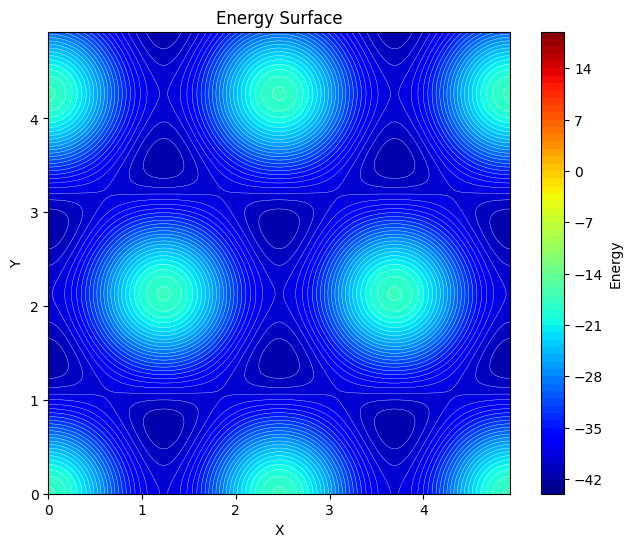

In [ ]:
# Plot the energy surface
level = np.arange(-44,20,1)
fig,ax = plt.subplots(1,1,figsize=(8, 6))
cs = plt.contourf(X, Y, energies.T, level, cmap='jet')
plt.contour(cs, colors='w',linewidths=0.25,linestyles='solid')
ax.set_aspect('equal')
plt.colorbar(cs,label='Energy')
plt.title('Energy Surface')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


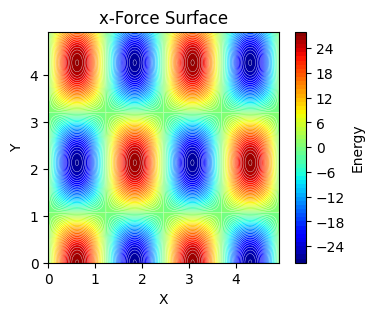

In [ ]:
# Plot the Force components in x-axis:
#level = np.arange(-44,20,1)
level=64
fig,ax = plt.subplots(1,1,figsize=(4, 3))
cs = plt.contourf(X, Y, forces_x.T, level, cmap='jet')
plt.contour(cs, colors='w',linewidths=0.25,linestyles='solid')
ax.set_aspect('equal')
plt.colorbar(cs,label='Energy')
plt.title('x-Force Surface')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

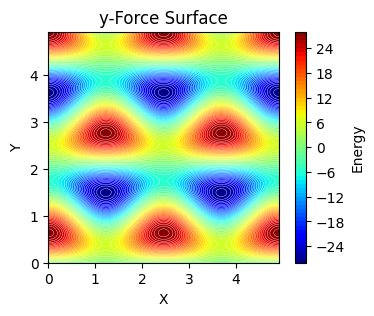

In [ ]:
# Plot the Force components in y-axis:
#level = np.arange(-44,20,1)
level=64
fig,ax = plt.subplots(1,1,figsize=(4, 3))
cs = plt.contourf(X, Y, forces_y.T, level, cmap='jet')
plt.contour(cs, colors='w',linewidths=0.25,linestyles='solid')
ax.set_aspect('equal')
plt.colorbar(cs,label='Energy')
plt.title('y-Force Surface')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

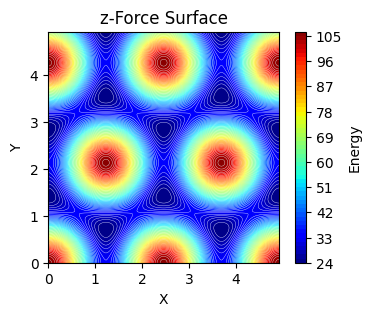

In [ ]:
# Plot the Force components in y-axis
#level = np.arange(-44,20,1)
level=64
fig,ax = plt.subplots(1,1,figsize=(4, 3))
cs = plt.contourf(X, Y, forces_z.T, level, cmap='jet')
plt.contour(cs, colors='w',linewidths=0.25,linestyles='solid')
ax.set_aspect('equal')
plt.colorbar(cs,label='Energy')
plt.title('z-Force Surface')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

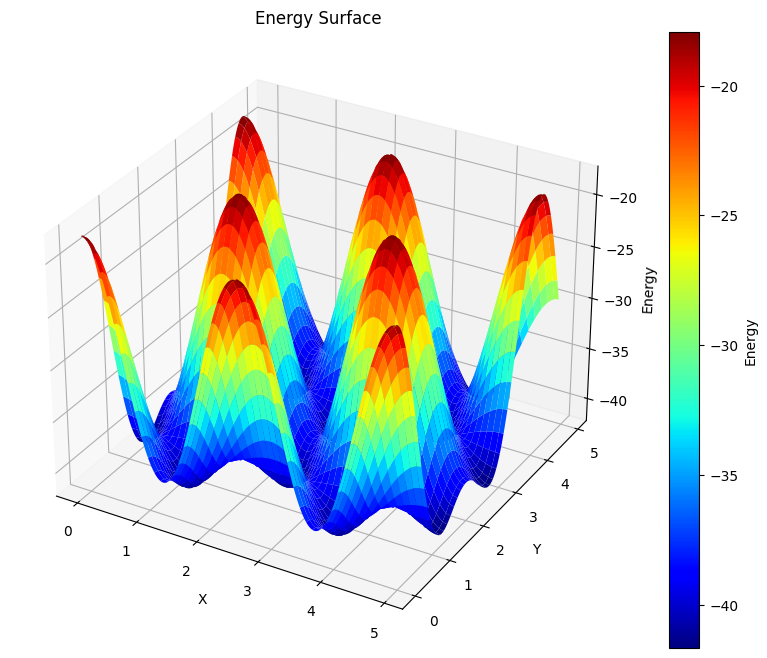

In [ ]:
# Plot the energy surface
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, energies.T, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Energy')
ax.set_title('Energy Surface')
fig.colorbar(surf, label='Energy')
plt.show()

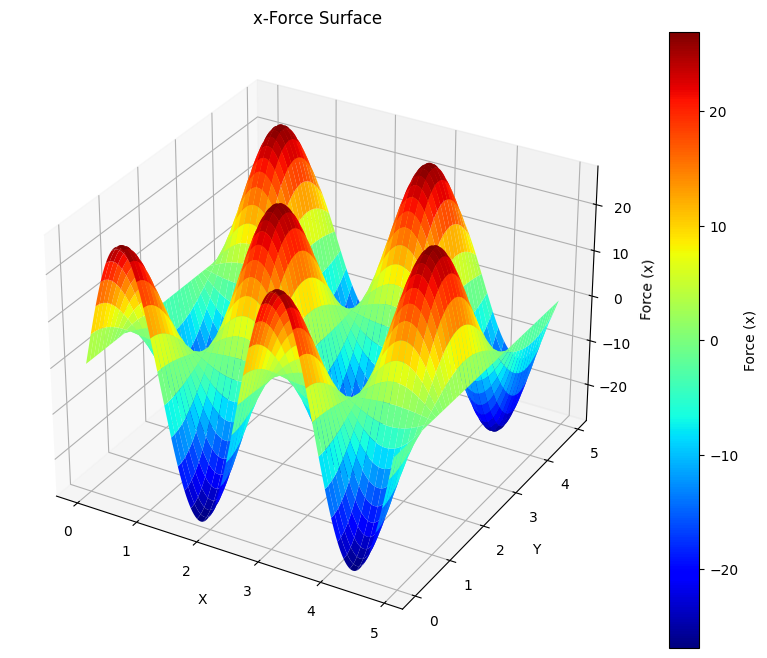

In [ ]:
# Plot the force components in x-axis
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, forces_x.T, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Force (x)')
ax.set_title('x-Force Surface')
fig.colorbar(surf, label='Force (x)')
plt.show()

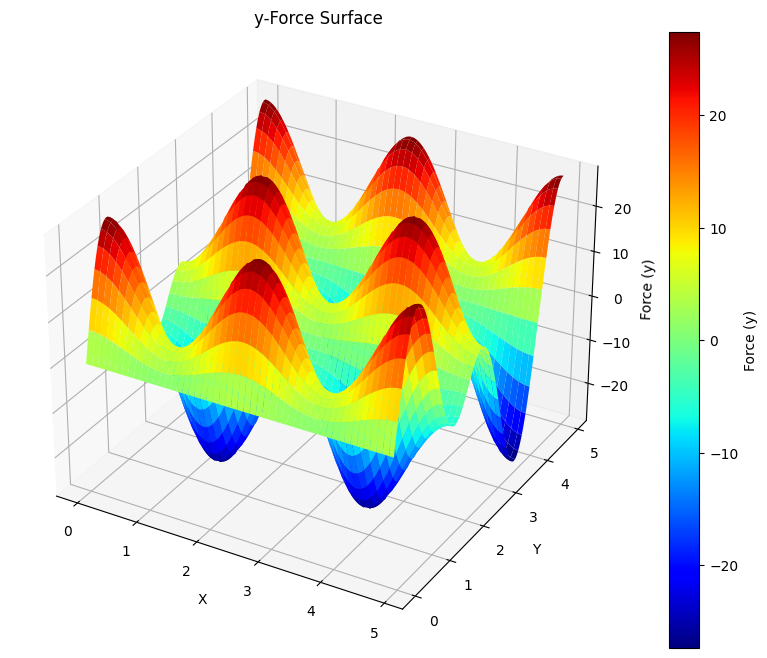

In [ ]:

# Plot the force components in y-axis
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, forces_y.T, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Force (y)')
ax.set_title('y-Force Surface')
fig.colorbar(surf, label='Force (y)')
plt.show()

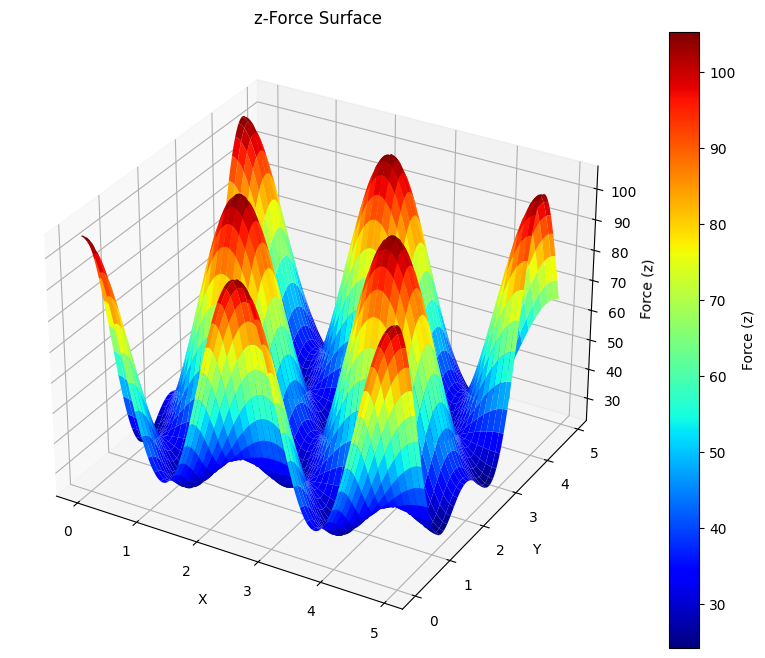

In [ ]:

# Plot the force components in z-axis
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, forces_z.T, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Force (z)')
ax.set_title('z-Force Surface')
fig.colorbar(surf, label='Force (z)')
plt.show()

In [ ]:
# the given parameters
num_points = 60
z_values = [3.0, 3.2, 3.6]
x = 0  # Fixing x-coordinate at 0
armchair_distance = 2 * lattice_constant / np.sqrt(3) #the distance between two adjacent atoms in the y-direction
y_range = np.linspace(0, 6 * armchair_distance, num_points) #the range of y-coordinates based on the armchair distance

PES1 = PES(C0_min, C1_min, C2_min, C0_max, C1_max, C2_max, lattice_constant) # Initializing the PES object

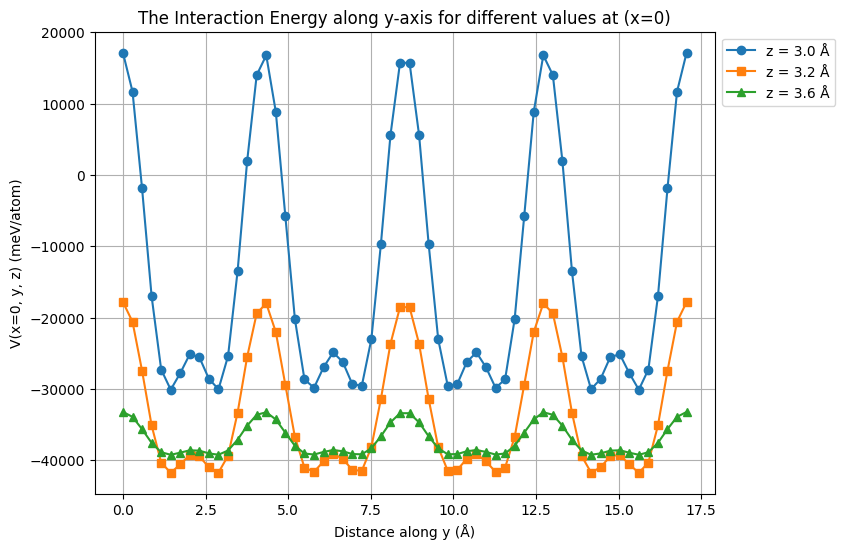

In [ ]:
plt.figure(figsize=(8, 6))
for idx, z in enumerate(z_values):
    energies = PES1.V(x, y_range, z) # "class name.V" is a method defined with ib the PES to calculate the interaction Enrgy

    # Choose line style based on z value
    if z == 3.0:
        marker= 'o'  #
    elif z == 3.2:
        marker= 's'  #
    else:
        marker= '^'  #

    plt.plot(y_range, energies * 1000, marker=marker, label=f'z = {z} Å') # Plot the interaction energy per atom along the y-axis

plt.title('The Interaction Energy along y-axis for different values at (x=0)') #('The PES profile along the armchair direction (y-axis) for different values of the vertical separation when x is fixed at 0')
plt.xlabel('Distance along y (Å)')
plt.ylabel('V(x=0, y, z) (meV/atom)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

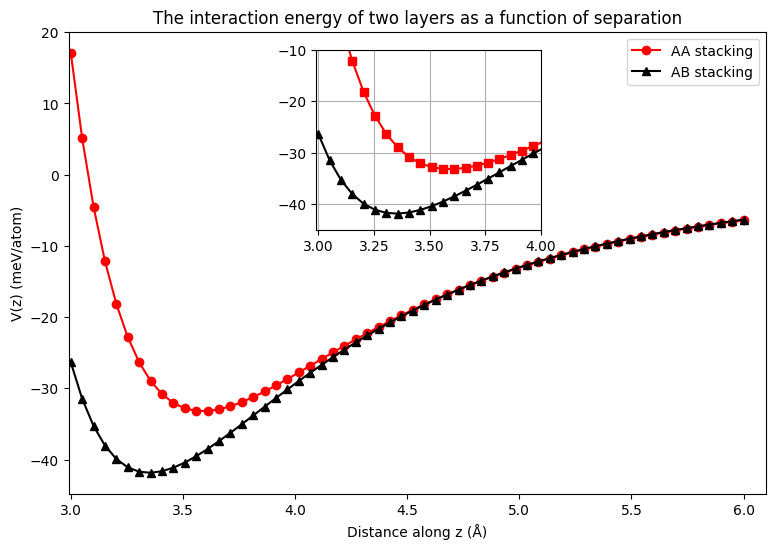

In [ ]:
z_values = np.linspace(3.0, 6.0, num_points) #to define the distances along the z-axis

# to calculate the interaction energies for AA and AB stacking
energy_AA = [PES1.V(0, 0, z) for z in z_values]
energy_AB = [PES1.V(1, 1, z) for z in z_values]

# Main plot
plt.figure(figsize=(9, 6))
plt.plot(z_values, energy_AA, 'ro-', label='AA stacking')
plt.plot(z_values, energy_AB, 'k^-', label='AB stacking')


plt.title('The interaction energy of two layers as a function of separation')
plt.xlabel('Distance along z (Å)')
plt.ylabel('V(z) (meV/atom)')
plt.xlim(2.99, 6.1)
plt.legend()

# Zoomed-in plot
plt.axes([0.4, 0.55, 0.25, 0.3])  # [left-right, bottom-up, width, height]
plt.plot(z_values, energy_AA, 'rs-')
plt.plot(z_values, energy_AB, 'k^-')
plt.xlim(2.99, 4)
plt.ylim(-45, -10)
plt.grid(True)
plt.show()
